# CHAPTER 5. 모델 평가와 성능 향상

지금까지 지도 학습과 비지도 학습 이론을 다루면서 다양한 머신러닝 알고리즘을 살펴봤습니다.
이제 모델 평가와 매개변수 선택에 대해 더 자세히 배워보도록 하겠습니다.

3장에서 보았듯이 비지도 학습 모델을 평가하고 선택하는 일은 매우 정성적인 작업이므로 이번 장에서는 지도 학습인 회귀와 분류 모델의 평가와 선택에 집중할 것입니다.

우리는 지도 학습 모델을 평가하기 위해 train_test_split 함수를 사용하여 데이터셋을 훈련 세트와 테스트 세트로 나눴습니다.
그리고 모델을 만들기 위해 훈련 세트에 fit 메서드를 적용했고, 모델을 평가하기 위해 테스트 세트에 score 메서드를 사용했습니다.
예를 들어 분류에서 score 메서드는 정확히 분류된 샘플의 비율을 계산하는 역할을 합니다.
다음 코드는 설명한 과정을 담은 예제입니다.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 인위적인 데이터셋을 만듭니다.
X, y = make_blobs(random_state=0)
# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 객체를 만들고 훈련 세트로 학습시킵니다.
logreg = LogisticRegression().fit(X_train, y_train)
# 모델을 테스트 세트로 평가합니다.
print(f'테스트 세트 점수: {logreg.score(X_test, y_test):.2f}')

테스트 세트 점수: 0.88


데이터를 훈련 세트와 테스트 세트로 나누는 이유는 지금까지 본 적 없는 새로운 데이터에 모델이 얼마나 잘 일반화되는지 측정하기 위해서입니다.
모델이 훈련 세트에 잘 맞는 것보다, 학습 과정에 없던 데이터에 대해 예측을 얼마나 잘 하느냐가 중요합니다.

이번 장에서는 두 가지 관점에서 이 평가 방법을 확장해보겠습니다.
먼저 안정적인 일반화 성능 측정 방법인 교차 검증을 소개하고, score 메서드가 제공하는 정확도와 R<sup>2</sup> 값 이외에 분류와 회귀 성능을 측정하는 다른 방법을 알아보겠습니다.

또한, 가장 좋은 일반화 성능을 얻기 위해서 지도 학습 모델의 매개변수를 조정하는 데 유용한 그리드 서치에 관해서도 이야기하겠습니다.

## 5.1 교차 검증

**교차 검증**은 일반화 성능을 재기 위해 훈련 세트와 테스트 세트로 한 번 나누는 것 보다 더 안정적이고 뛰어난 통계적 평가 방법입니다.
교차 검증에서는 데이터를 여러 번 반복해서 나누고 여러 모델을 학습합니다.
가장 널리 사용되는 교차 검증 방법은 **k-겹 교차 검증**으로 k는 특정 숫자로 보통 5나 10을 사용합니다.
k-겹 교차 검증을 하려면 데이터를 먼저 **폴드**라고 하는 거의 비슷한 크기의 '부분 집합' k개로 나눕니다.
그다음 일련의 모델들을 만듭니다.
첫 번째 모델은 첫 번째 폴드를 테스트 세트로 사용하고 나머지 폴드를 훈련 세트로 사용하여 학습합니다.
즉, 이 모델은 k-1개의 데이터를 사용해 만들어지고 1개의 폴드를 사용해 정확도를 평가합니다.
그다음 두 번째 모델은 두 번째 폴드를 테스트 세트로 사용하고 나머지 폴드의 데이터를 훈련 데이터로 사용합니다.
이런 방법으로 나머지 폴드를 테스트 세트로 사용하고 학습을 반복합니다.
이렇게 데이터를 훈련 세트와 테스트 세트로 나누는 k번의 분할마다 정확도를 측정하여, 결국 k개의 정확도 값을 얻게 됩니다.
이 과정을 나타내면 다음과 같습니다.

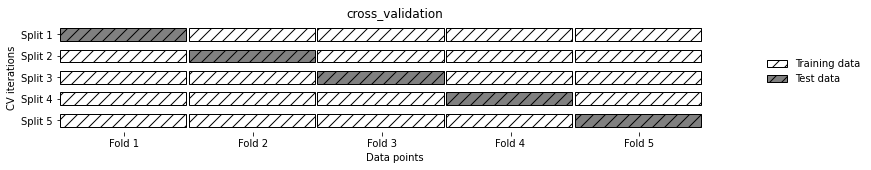

In [2]:
import mglearn

mglearn.plots.plot_cross_validation()

보통 데이터의 첫 번째 1/k 조각이 첫 번째 폴드이고 두 번째 조각이 두 번째 폴드가 되는 방식입니다.

### 5.1.1 scikit-learn의 교차 검증

scikit-learn에서 교차 검증은 model_section 모듈의 cross_val_score 함수로 구현되어 있습니다.
cross_val_score 함수의 매개변수는 평가하려는 모델과 훈련 데이터, 타깃 레이블입니다.
iris 데이터셋에 적용한 LogisticRegression을 평가해보겠습니다.

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print('교차 검증 점수:', scores)

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


여기에서는 cross_val_score가 5-겹 교차 검증을 수행했기 때문에 5개의 점수가 반환되었습니다.
현재 scikit-learn의 기본 값은 5-겹 교차 검증이지만 scikit-learn 0.22 버전 이전은 3-겹 교차 검증이 진행됩니다.<sup>[1]</sup>
폴드의 수는 cv  매개변수를 사용해서 바꿀 수 있습니다.

<sup>[1]</sup>:
GridSearchCV 클래스도 scikit-learn 0.22 버전부터 3-겹 교차 검증에서 5-겹 교차 검증으로 바뀌었습니다.

In [4]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print('교차 검증 점수:', scores)

교차 검증 점수: [0.98 0.96 0.98]


적어도 5-겹 교차 검증 정도를 사용하는 것이 좋습니다. 교차 검증의 정확도를 간단라게 나타내려면 평균을 사용합니다.

In [5]:
scores = cross_val_score(logreg, iris.data, iris.target)
print(f'교차 검증 점수 평균: {scores.mean():.2f}')

교차 검증 점수 평균: 0.97


교차 검증 점수의 평균값으로 우리는 이 모델의 정확도가 대략 97%일 것으로 기대할 수 있습니다.
5-겹 교차 검증이 만들 다섯 개의 값을 모두 보면 100%에서 90%까지 폴드에 따라 비교적 차이가 큽니다.
이는 모델이 훈련에 사용한 폴드에 매우 의존적이거나 데이터셋이 작기 때문일 수 있습니다.
교차 검증에 cross_validate 함수를 사용할 수도 있습니다.
이 함수는 cross_val_score 함수와 인터페이스가 비슷하지만 분할마다 훈련과 테스트에 걸린 시간을 담은 딕셔너리를 반환합니다.
여기서 테스트 점수를 포함해 설정에 따라 훈련 점수도 얻을 수 있습니다.<sup>[2]</sup>

<sup>[2]</sup>:
사실 cross_val_score 함수는 cross_validate 함수를 사용합니다.
cross_val_score 함수는 cross_validate에서 반환된 결과 중 test_score 키의 값만 반환합니다.
cross_validate 함수에 관한 더 자세한 내용은 [블로그](https://biy.ly/2B05jJ3)를 참고하세요.

In [6]:
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)
res

{'fit_time': array([0.01952267, 0.01951957, 0.02540851, 0.0176053 , 0.02147198]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

pandas를 사용하여 걸과값을 출력하고 평균을 계산해보겠습니다.

In [7]:
from IPython.display import display
import pandas as pd

df = pd.DataFrame(res)
display(df)
print('\n평균 시간과 점수:\n', df.mean())

,fit_time,score_time,test_score,train_score
0,0.019523,0.0,0.966667,0.966667
1,0.019520,0.0,1.000000,0.966667
2,0.025409,0.0,0.933333,0.983333
3,0.017605,0.0,0.966667,0.983333
4,0.021472,0.0,1.000000,0.975000



평균 시간과 점수:
 fit_time       0.020706
score_time     0.000000
test_score     0.973333
train_score    0.975000
dtype: float64


### 5.1.2 교차 검증의 장점

데이터를 훈련 세트와 테스트 세트로 한 번 나누는 것 보다 교차 검증을 사용하면 몇 가지 장점이 있습니다.
먼저 train_test_split은 데이터를 무작위로 나눕니다.
데이터를 무작위로 나눌 때 운 좋게 훈련 세트에는 분류하기 어려운 샘플만 담기게 되었다고 가정해보겠습니다.
이 경우 테스트 세트에는 분류하기 쉬운 샘플만 들어있어서 테스트 세트의 정확도는 비현실적으로 높게 나올 것입니다.
반대로 운 나쁘게 분류하기 어려운 샘플들이 모두 테스트 세트에 들어간다면 정확도가 아주 낮게 나올 것입니다.
하지만 교차 검증을 사용하면 테스트 세트에 각 샘플이 정확히 한 번씩 들어갑니다.
각 샘플은 폴드 중 하나에 속하며 각 폴드는 한 번씩 테스트 세트가 됩니다.
그렇기 때문에 교차 검증의 점수와 평균값을 높이기 위해서는 데이터셋에 있는 모든 샘플에 대해 모델이 잘 일반화되어야 합니다.

또 데이터를 여러 개로 나누면 모델이 훈련 데이터에 얼마나 민감한지 알 수 있습니다. 예를 들어, iris 데이터셋에서 90~100%의 정확도를 얻었습니다. 이 범위는 꽤 넓으며 새로운 데이터를 적용했을 때 최악의 경우와 최선의 경우를 짐작할 수 있게 해줍니다.

교차 검증의 또 다른 장점은 분할을 한 번 했을 때보다 데이터를 더 효과적으로 사용할 수 있다는 점입니다.
train_test_split을 사용하면 일반적으로 데이터 중 75%를 훈련 세트로 사용하고 25%를 평가에 사용합니다.
반면 5-겹 교차 검증을 사용하면 매 반복에서 4/5의 데이터, 즉 80%를 모델 학습에 사용합니다.
또한, 10-겹 교차 검증이라면 데이터의 9/10인 90%를 모델 학습에 사용합니다.
많은 데이터는 일반적으로 더 정확한 모델을 만들어냅니다.

교차 검증의 주요 단점은 연산 비용이 능어난다는 것입니다. 모델을 k개 만들어야 하므로 데이터를 한 번 나눴을 때보다 대략 k배 더 느립니다.

```
NOTE_ 교차 검증이 새로운 데이터에 적용할 모델을 만드는 방법이 아니라는 점을 잊지 마세요.
교차 검증 함수는 모델을 반환하지 않습니다.
cross_val_score 함수를 호출하면 내부적으로 여러 모델이 만들어지지만, 교차 검증의 목적은 단지 주어진 데이터셋에 학습된 알고리즘이 얼마나 잘 일반화될지 평가하는 것입니다.<sup>[3]</sup>
```

<sup>[3]</sup>:
교차 검증으로 모델을 만들어낼 수는 없지만 sklearn.model_section 모듈의 cross_val_predict 함수를 사용하여 교차 검증으로 만든 예측값을 구할 수 있습니다.
cross_val_predict(logreg, iris.data, iris.target)과 같이 호출하면 각 폴드가 테스트 세트일 때 예측된 값을 반환해줍니다.

### 5.1.3 계층별 k-겹 교차 검증과 그외 전략들

앞 절에서 언급한 대로 데이터셋을 나열 순서대로 k개의 폴드로 나누는 것이 항상 좋지는 않습니다. iris 데이터셋으로 예를 들어보겠습니다.

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()
print('iris 레이블:\n', iris.target)

iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


결과에서 볼 수 있듯이 첫 번째 1/3은 클래스 0입니다. 두 번째 1/3은 클래스 1이고 마지막 1/3은 클래스 2입니다. 이 데이터에 3-겹 교차 검증을 적용한다고 가정하겠습니다.
첫 번째 폴드는 클래스 0만 가지고 있으므로, 첫 번째 반복에서 테스트 세트는 클래스 0만을, 훈련 세트는 클래스 1과 2만을 가지게 됩니다.
세 번의 반복 모두 훈련 세트와 테스트 세트의 클래스가 다르므로 이 데이터셋에서 3-겹 교차 검증의 정확도는 0이 됩니다.
iris 데이터셋에서 0% 보다는 높은 정확도가 나와야 하므로 이 방법은 잘못되었습니다.

단순한 k-겹 교차 검증에는 문제가 있으니, scikit-learn은 분류일 경우 이 방법 대신 **계층별 k-겹 교차 검증**을 사용합니다.<sup>[4]</sup>
계층별 교차 검증에서는 다음 코드의 결과처럼 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눕니다.

<sup>[4]</sup>:
cross_val_score 함수에서 폴드를 나눌 때 기본적으로 분류에는 StratifiedFold를 사용하여 훈련 세트와 테스트 세트를 나누고, 회귀에는 단순한 KFold를 적용합니다.
KFold에서 shuffle 매개변수를 기본값 False 대신 True로 지정하면 폴드를 나누기 전에 무작위로 섞을 수 있습니다.
하지만 cross_val_score 함수를 사용할 때 KFold의 매개변수를 제어할 방법은 없습니다.
이를 위해서는 다음 절에서 나오는 것처럼 따로 KFold 객체를 만들어 cross_val_score 함수의 cv 매개변수로 전달해야 합니다.

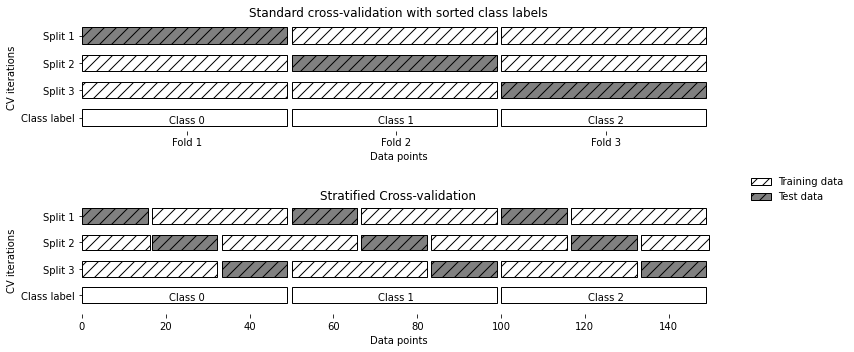

In [9]:
mglearn.plots.plot_stratified_cross_validation()

예를 들어 샘플의 90%가 클래스 A이고 10%가 클래스 B에 속한다면, 계층별 교차 검증은 각 폴드에 클래스 A 샘플이 90%, 클래스 B 샘플이 10%가 되도록 만듭니다.

분류기의 일반화 성능을 측정할 때 k-겹 교차 검증보다 더 안정적인 계층별 k-겹 교차 검증을 사용하는 것이 좋습니다.
클래스 B에 속한 샘플이 10% 정도라면 기본 k-겹 교차 검증에서는 클래스 A 샘플만 가진 폴드가 생기기 쉽습니다.
이런 폴드를 테스트 세트로 사용하면 분류기의 전체 성능을 크게 왜곡하게 됩니다.

scikit-learn은 회귀에서 기본 k-겹 교차 검증을 사용합니다.
회귀에서도 폴드가 서로 다른 타깃값을 포함하도록 만들 수 있지만, 대부분의 사용자에게는 생소한 일이며 일반적으로 사용하는 방법은 아닙니다.

#### 교차 검증 상세 옵션

앞서 cross_val_score를 사용할 때 cv 매개변수를 이용해 폴드의 개수를 조정해보았습니다.
그러나 scikit-learn에서는 cv 매개변수에 **교차 검증 분할기**를 전달하여 데이터를 분할할 때 더 세밀하게 제어할 수 있습니다.
대부분의 경우 회귀에서는 k-겹 교차 검증, 분류에서는 계층별 k-겹 교차 검증의 기본값이 잘 작동합니다.
하지만 조금 다른 전략이 필요할 때가 있습니다.
예를 들어 다른 사람의 결과를 재현하기 위해 분류 데이터셋에 기본 k-겹 교차 검증을 사용해야할 때입니다.
이렇게 하려면 먼저 model_selection 모듈에서 KFold 분할기를 임포트하고 원하는 폴드 수를 넣어 객체를 생성해야 합니다.

In [10]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

그런 다음 kfold 객체를 cross_val_score의 cv 매개변수로 전달합니다.

In [11]:
print('교차 검증 점수:', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수: [1.         1.         0.86666667 0.93333333 0.83333333]


다음 iris 데이터셋에 3-겹 교차 검증을 사용하는 것ㅇ이 좋은 방법이 아님을 확인해보겠습니다.

In [12]:
kfold = KFold(n_splits=3)
print('교차 검증 점수:', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수: [0. 0. 0.]


각 폴드는 iris 데이터셋의 클래스 중 하나에 대응하므로 아무것도 학습할 수가 없습니다.
계층별 폴드를 만드는 대신 이 문제를 해결하는 다른 방법은 데이터를 섞어서 샘플의 순서를 뒤죽박죽으로 만드는 것입니다.
이렇게 하려면 KFold의 shuffle 매개변수를 True로 주면 됩니다.
데이터를 섞을 때 random_state를 고정해서 똑같은 작업을 재현할 수 있습니다.
그렇지 않으면 cross_val_score를 실행할 때마다 폴드가 바뀌어 매번 결과가 달라질 것입니다.
이는 문제가 되는 것은 아니지만 예상하지 못해 당황할 수는 있습니다.
데이터를 분할하기 전에 섞어주면 결과를 더 좋게 만듭니다.

In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('교차 검증 점수:', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수: [0.98 0.96 0.96]


#### LOOCV

또 다른 교차 검증 방법으로 **LOOCV**도 자주 사용합니다.
LOOCV 교차 검증은 폴드 하나에 샘플 하나만 들어있는 k-겹 교차 검증으로 생각할 수 있습니다.
각 반복에서 하나의 데이터 포인트를 선택해 테스트 세트로 사용합니다.
비록 데이터셋이 클 때는 시간이 매우 오래 걸리지만, 작은 데이터셋에서는 이따금 더 좋은 결과를 만들어냅니다.

In [14]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('교차 검증 분할 횟수:', len(scores))
print(f'평균 정확도: {scores.mean():.2f}')

교차 검증 분할 횟수: 150
평균 정확도: 0.97


#### 임의 분할 교차 검증

매우 유연한 또 하나의 교차 검증 전략은 **임의 분할 교차 검증**입니다.
임의 분할 교차 검증에서는 train_size만큼의 포인트로 훈련 세트를 만들고, test_size만큼의 훈련 세트와 중첩되지 않은 포인트로 테스트 세트를 만들도록 분할합니다.
이 분할은 n_splits 횟수만큼 반복됩니다.
다음 코드는 샘플이 10개인 데이터셋을 5개 포인트의 훈련 세트, 2개 포인트의 테스트 세트로 4번 반복하여 나누는 것을 보여줍니다.
train_size와 test_size에 정수를 입력하면 데이터 포인트의 절대 개수를 의미하며, 실수를 입력하면 전체 데이터에서 비율을 나타냅니다.

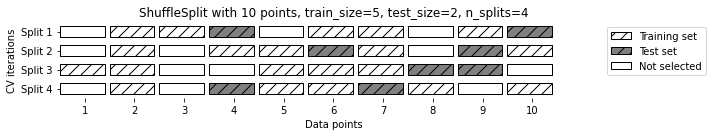

In [15]:
mglearn.plots.plot_shuffle_split()

다음 코드는 데이터셋의 50%를 훈련 세트로, 50%를 테스트 세트로 10번 반복 분할합니다.<sup>[5]</sup>

<sup>[5]</sup>:
ShuffleSplit은 데이터에서 무작위로 추출하여 훈련 세트와 테스트 세트를 만드므로 random_state 매개변수를 지정하지 않으면 실행할 때마다 결과가 다르게 나옵니다.
또한, KFold와 다르게, 하나의 데이터 포인트가 여러 테스트 세트에 포함될 수 있습니다.

In [16]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=10, test_size=0.5, train_size=0.5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=ss)
print('교차 검증 점수:', [round(score, 3) for score in scores])

교차 검증 점수: [0.947, 0.96, 1.0, 0.987, 0.947, 0.973, 0.933, 0.96, 0.92, 0.947]


임의의 분할 교차 검증은 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할 때 유용합니다.
또한 train_size와 test_size의 합을 다르게 함으로써 전체 데이터의 일부만 사용할 수 있습니다.
이렇게 데이터를 부분 샘플링하는 방식은 대규모 데이터셋으로 작업할 때 도움이 됩니다.

한편 ShuffleSplit의 계층별 버전으로 분류 작업에 더 적합한 StratifiedShuffleSplit도 있습니다.

#### 그룹별 교차 검증

데이터 안에 매우 연관된 그룹이 있을 때도 교차 검증을 널리 사용합니다.
얼굴 사진에서 표정을 인식하는 시스템을 만들기 위해 100명의 사진을 모았다고 가정하겠습니다.
한 사람을 찍은 여러 장의 사진이 각기 다른 표정을 담고 있습니다.
이 데이터셋에 없는 사람의 표정을 정확히 구분할 수 있는 분류기를 만드는 것이 목표입니다.
이 분류기의 성능을 측정하기 위해 계층별 교차 검증을 사용할 수 있지만, 같은 사람의 사진이 훈련 세트와 테스트 세트에 모두 나타날 수 있습니다.
이럴 때 완전히 새로운 얼굴보다 훈련 세트에 있던 얼굴의 표정은 훨씬 쉽게 식별할 수 있을 것입니다.
새 얼굴에 대한 일반화 성능을 더 정확하게 평가하려면 훈련 세트와 테스트 세트에 서로 다른 사람의 사진이 들어가도록 해야합니다.

이를 위해 사진의 사람이 누구인지 기록한 배열을 groups 매개 변수로 전달받을 수 있는 GroupKFold를 사용할 수 있습니다.<sup>6</sup>
groups 배열은 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹을 지정하는 것이며, 클래스 레이블과 혼동해서는 안 됩니다.

<sup>6</sup>: cross_val_score 함수로 넘겨진 groups 매개변수는 함수 내부에서 cv의 splits 메서드를 호출할 때 groups를 매개변수로 전달합니다.

데이터에 그룹이 있는 예로는 의로 애플리케이션이 일반적입니다.
여기서는 같은 환자로부터 얻은 여러 샘플을 가지고 새로운 환자에게 일반화하는 것이 목적입니다.
비슷하게 음성 인식에서도 데이터셋에 같은 사람의 목소리가 여러 개 녹음되어 있을 수 있으며, 관심 사항은 새로운 사람의 대화를 인식하는 것입니다.

아래는 인위적으로 만든 데이터셋에 groups 배열로 그룹을 지정하는 예입니다.
데이터셋은 12개의 포인트로 이뤄져 있고 groups는 각 데이터 포인트에 대해 각 포인트가 어떤 그룹에 속하는지를 나타냅니다.
4개의 그룹을 나타내고 있으며 처음 3개의 샘플은 첫 번째 그룹, 다음 4개의 샘플은 두 번째 그룹을 나타내는 식입니다.

In [17]:
from sklearn.model_selection import GroupKFold

# 인위적 데이터셋을 만듭니다.
X, y = make_blobs(n_samples=12, random_state=0)
# 처음 세 개의 샘플은 같은 그룹에 속하고 다음은 네 개의 샘플이 같습니다.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print('교차 검증 점수:', scores)

교차 검증 점수: [0.75       0.6        0.66666667]


샘플 데이터를 그룹으로 정렬할 필요는 없습니다.
여기서는 예를 들기 위해서 정렬한 것뿐입니다.
분할은 다음 코드의 결과처럼 그룹 레이블을 기반으로 계산합니다.
이 그림에서 볼 수 있듯이 각 분할에서 한 그룹 전체가 훈련 세트 아니면 테스트 세트에 있습니다.

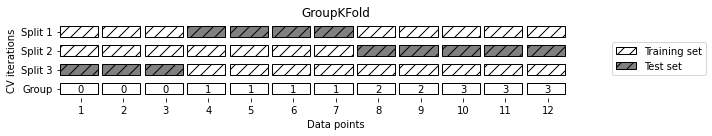

In [18]:
mglearn.plots.plot_group_kfold()

scikit-learn은 다양한 상황에 적용할 수 있는 많은 교차 검증 전략을 제공합니다.
[scikit-learn 사용자 가이드](http://scikit-learn.org/stable/modules/cross_calidation.html)를 참고하세요.
그중 KFold, StratifiedKFold, GroupKFold를 가장 널리 사용합니다.<sup>7</sup>

<sup>7</sup>:
scikit-learn 0.19 버전부터 교차 검증을 반복하여 실행할 수 있는 RepeatedKFold와 RepeatedStratifiedKFold가 추가되었습니다.
자세한 내용은 다음 절과 [블로그](https://goo.gl/Cx8RSr)를 참고하세요.

### 5.1.4 반복 교차 검증<sup>8</sup>

<sup>8</sup>:
이 절의 코드는 번역서 GitHub의 '05.1.4-RepeatedKFold.ipynb' 노트북에 있습니다.

데이터셋의 크기가 크지 않을 경우 안정된 검증 점수를 얻기 위해 교차 검증을 반복하여 여러 번 수행하는 경우가 많습니다.
이를 위해 scikit-learn 0.19 버전에서 RepeatedKFold와 RepeatedStratifiedKFold 분할기가 추가되었습니다.
이 클래스의 객체를 cross_cal_score 또는 cross_calidate 함수의 cv 매개변수에 전달하여 교차 검증을 반복할 수 있습니다.

회귀에는 RepeatedKFold를 사용하고 분류에는 RepeatedStratifiedKFold를 사용합니다.
RepeatedKFold는 KFold 클래스를 사용하여 훈련 폴드와 테스트 폴드를 분할합니다.
이와 비슷하게 RepeatedStratifiedKFold는 StratifiedKFold 클래스를 사용합니다.
분할 폴드 수는 n_splits 매개변수로 설정하며 기본값은 5입니다.
즉, 기본적으로 5-겹 교차 검증을 수행합니다.
반복 횟수는 n_repeats 매개변수로 설정하며 기본값은 10입니다.
반복할 때마다 데이터를 다시 섞습니다.

iris 데이터셋에 반복 교차 검증을 적용해보겠습니다.

In [19]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

iris = load_iris()
logreg = LogisticRegression()

iris 데이터셋을 로드한 후 로지스틱 회귀 모델을 준비합니다.
다른 분할기와 마찬가지로 RepeatedKFold와 RepeatedStratifiedKFold도 model_selection 모듈 아래에 위치해 있습니다.
전체 검증 점수는 n_splits × n_repeats 개수 만큼 만들어집니다.
기본값을 사용하여 RepeatedStratifiedKFold의 객체를 만들면 5 × 10, 즉 50개의 모델을 훈련하여 평가한 점수가 반환됩니다.

In [20]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)
print('교차 검증 점수:\n', scores)
print(f'교차 검증 평균 점수: {scores.mean():.3f}')

교차 검증 점수:
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
교차 검증 평균 점수: 0.965


반복 교차 검증으로 평균 점수 0.965를 얻었습니다.
반복 교차 검증을 위한 두 분할기는 다음 절에 설명한 GridSearchCV의 cv 매개변수에도 적용할 수 있습니다.

## 5.2 그리드 서치

앞에서 모델의 일반화 성능을 측정하는 법을 배웠으니 이제 다음 단계로 매개변수를 튜닝하여 일반화 성능을 개선하겠습니다.
2장과 3장에서 scikit-learn의 여러 알고리즘의 매개변수 설정에 대해 이야기했는데 매개변수를 조정하기 전에 그 매개변수의 의미를 이해하는 것이 중요합니다.
모델에서 중요한 매개변수의 일반화 성능을 최대로 높여주는 값을 찾는 일은 어려운 작업이지만, 모든 모델과 데이터셋에서 해야하는 필수적인 일입니다.
많이 하는 작업이므로 scikit-learn에는 이를 위한 메서드가 준비되어 있습니다.
가장 많이 사용하는 방법은 **그리드 서치**로서 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도해보는 것입니다.

SVC Python 클래스에 구현된 RBF 커널 SVM을 사용해보겠습니다.
2장에서 본 것처럼 커널의 폭에 해당하는 gamma와 규제 매개변수 C가 중요합니다.
매개변수 gamma와 C에 0.001, 0.01, 0.1, 1, 10, 100의 값을 적용해보겠습니다.
gamma와 C의 설정값이 각각 6개씩이니 조합의 수는 총 36개입니다.
모든 조합을 살펴보기 위해 SVM 매개변수 설정 테이블, 즉 그리드는 6 × 6의 행렬을 가지게 됩니다.

### 5.2.1 간단한 그리드 서치

두 매개변수 조합에 대해 분류기를 학습시키고 평가하는 간단한 그리드 서치를 for를 사용해 만들 수 있습니다.

In [21]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(f'훈련 세트의 크기: {X_train.shape[0]}    테스트 세트의 크기: {X_test.shape[0]}')

best_score, best_parameters = 0, None
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 각 매개변수 조합에 대해 SVC를 훈련합니다.
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC를 평가합니다.
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록합니다.
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print(f'최고 점수: {best_score:.2f}')
print('최적 매개변수:', best_parameters)

훈련 세트의 크기: 112    테스트 세트의 크기: 38
최고 점수: 0.97
최적 매개변수: {'C': 100, 'gamma': 0.001}
